In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#importing data into google colab
from google.colab import files
file_upload=files.upload()

KeyboardInterrupt: ignored

In [ ]:
#loading the data
df=pd.read_csv('/content/ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [ ]:
#showing information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31049 entries, 0 to 31048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             31049 non-null  int64  
 1   date            31049 non-null  object 
 2   venue           31049 non-null  object 
 3   bat_team        31049 non-null  object 
 4   bowl_team       31048 non-null  object 
 5   batsman         31048 non-null  object 
 6   bowler          31048 non-null  object 
 7   runs            31048 non-null  float64
 8   wickets         31048 non-null  float64
 9   overs           31048 non-null  float64
 10  runs_last_5     31048 non-null  float64
 11  wickets_last_5  31048 non-null  float64
 12  striker         31048 non-null  float64
 13  non-striker     31048 non-null  float64
 14  total           31048 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 3.6+ MB


Data Preprocessing

In [ ]:
#printing the rows and columns of data
rows=df.shape[0]
cols=df.shape[1]
print('Number of rows=',rows)
print('Number of columns=',cols)

Number of rows= 31049
Number of columns= 15


In [ ]:
#checking null values
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         1
batsman           1
bowler            1
runs              1
wickets           1
overs             1
runs_last_5       1
wickets_last_5    1
striker           1
non-striker       1
total             1
dtype: int64

In [ ]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,252,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,66.0,1.0,7.4,40.0,1.0,10.0,8.0,205.0
31045,252,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,67.0,1.0,7.5,41.0,1.0,10.0,9.0,205.0
31046,252,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,68.0,1.0,7.5,38.0,1.0,10.0,9.0,205.0
31047,252,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,69.0,1.0,7.6,39.0,1.0,11.0,9.0,205.0


In [ ]:
#dropping unnecessary columns
cols_to_drop=['mid','striker','non-striker']
df.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
df.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,222.0


In [ ]:
#dropping the row containing NaN values as this row has no useful data
df.drop([31048])

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31043,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,66.0,1.0,7.3,41.0,1.0,205.0
31044,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,66.0,1.0,7.4,40.0,1.0,205.0
31045,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,67.0,1.0,7.5,41.0,1.0,205.0
31046,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,68.0,1.0,7.5,38.0,1.0,205.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31049 entries, 0 to 31048
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            31049 non-null  object 
 1   venue           31049 non-null  object 
 2   bat_team        31049 non-null  object 
 3   bowl_team       31048 non-null  object 
 4   batsman         31048 non-null  object 
 5   bowler          31048 non-null  object 
 6   runs            31048 non-null  float64
 7   wickets         31048 non-null  float64
 8   overs           31048 non-null  float64
 9   runs_last_5     31048 non-null  float64
 10  wickets_last_5  31048 non-null  float64
 11  total           31048 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.8+ MB


In [ ]:
#printing all the teams
print(np.unique(df['bat_team']))

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Kings XI Punjab' 'Kochi Tuskers Kerala' 'Kolkata Knight Riders'
 'Mumbai Indians' 'Pune Warriors' 'Rajasthan Royals' 'Royal '
 'Royal Challengers Bangalore']


In [ ]:
#we don't want the teams which are not playing
all_teams=np.unique(df['bat_team'])
old_teams=['Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
current_teams=[teams for teams in all_teams if teams not in old_teams]
#use the rows which have current_teams
df=df[df['bat_team'].isin(current_teams) & df['bowl_team'].isin(current_teams)]

In [ ]:
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31043,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,66.0,1.0,7.3,41.0,1.0,205.0
31044,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,66.0,1.0,7.4,40.0,1.0,205.0
31045,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,V Kohli,JA Morkel,67.0,1.0,7.5,41.0,1.0,205.0
31046,2012-04-12,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,JA Morkel,68.0,1.0,7.5,38.0,1.0,205.0


In [ ]:
#checking for null values
df.isnull().sum()

date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

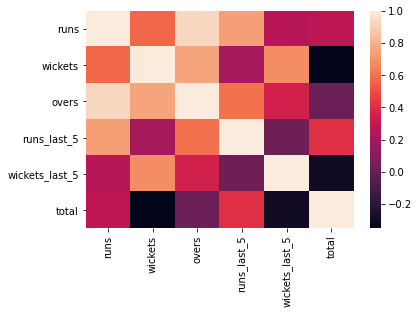

In [ ]:
#finding correlation between numerical features
corr=df.corr()

#plotting the correlations
sb.heatmap(corr)

In [ ]:
corr

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.569925,0.929865,0.735627,0.258244,0.279320
wickets,0.569925,1.000000,0.753559,0.205542,0.679240,-0.350520
overs,0.929865,0.753559,1.000000,0.594501,0.354875,0.021548
runs_last_5,0.735627,0.205542,0.594501,1.000000,0.028651,0.410047
wickets_last_5,0.258244,0.679240,0.354875,0.028651,1.000000,-0.289196
total,0.279320,-0.350520,0.021548,0.410047,-0.289196,1.000000


We find multicollinearity

In [ ]:
#encode the categorical columns
cat_cols=['venue','bat_team','bowl_team','batsman','bowler']

#finding unique values in each column
for i in cat_cols:
  n_unique=np.unique(df[i]).shape[0]
  print('No of unique values in {} column is {}'.format(i,n_unique))

No of unique values in venue column is 19
No of unique values in bat_team column is 7
No of unique values in bowl_team column is 7
No of unique values in batsman column is 221
No of unique values in bowler column is 173


In [ ]:
#Using Label Encoder
from sklearn.preprocessing import LabelEncoder

le_cols=['batsman','bowler','venue']
le=LabelEncoder()

for i in le_cols:
  df[i]=le.fit_transform(df[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,170,102,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31043,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,40,67,66.0,1.0,7.3,41.0,1.0,205.0
31044,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,205,67,66.0,1.0,7.4,40.0,1.0,205.0
31045,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,205,67,67.0,1.0,7.5,41.0,1.0,205.0
31046,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,40,67,68.0,1.0,7.5,38.0,1.0,205.0


In [ ]:
#One Hot Encoding on some columns
nominal_cols=['bat_team','bowl_team']

#one hot encode the cols
df=pd.concat((df,pd.get_dummies(df[nominal_cols])),axis=1)

In [ ]:
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
0,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,170,102,1.0,0.0,0.1,1.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,1.0,0.0,0.2,1.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.2,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.3,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2008-04-18,8,Kolkata Knight Riders,Royal Challengers Bangalore,34,102,2.0,0.0,0.4,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,40,67,66.0,1.0,7.3,41.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31044,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,205,67,66.0,1.0,7.4,40.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31045,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,205,67,67.0,1.0,7.5,41.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31046,2012-04-12,9,Royal Challengers Bangalore,Chennai Super Kings,40,67,68.0,1.0,7.5,38.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
#dropping the original cols as we have the encoded columns
df.drop(nominal_cols,axis=1,inplace=True)

In [ ]:
df

,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
0,2008-04-18,8,170,102,1.0,0.0,0.1,1.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2008-04-18,8,34,102,1.0,0.0,0.2,1.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2008-04-18,8,34,102,2.0,0.0,0.2,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2008-04-18,8,34,102,2.0,0.0,0.3,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2008-04-18,8,34,102,2.0,0.0,0.4,2.0,0.0,222.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,2012-04-12,9,40,67,66.0,1.0,7.3,41.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31044,2012-04-12,9,205,67,66.0,1.0,7.4,40.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31045,2012-04-12,9,205,67,67.0,1.0,7.5,41.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
31046,2012-04-12,9,40,67,68.0,1.0,7.5,38.0,1.0,205.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
#converting date to date format from string format
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['date'].dt.year

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
31043    2012
31044    2012
31045    2012
31046    2012
31047    2012
Name: date, Length: 20423, dtype: int64

In [ ]:
df['date'].dt.month

0        4
1        4
2        4
3        4
4        4
        ..
31043    4
31044    4
31045    4
31046    4
31047    4
Name: date, Length: 20423, dtype: int64

Splitting the dataset into training and testing data

In [ ]:
#splitting dataset into training and testing (taking into consideration the date-as time series data)
train=df[df['date'].dt.year<=2010]
test=df[df['date'].dt.year>2010]
print('Shape of training data is',train.shape[0],',',train.shape[1])
print('Shape of testing data is',test.shape[0],',',test.shape[1])

Shape of training data is 15367 , 24
Shape of testing data is 5056 , 24


In [ ]:
#dropping date column
train.drop(['date'],axis=1,inplace=True)
test.drop(['date'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Performing standardization on the data
from sklearn.preprocessing import StandardScaler

for i in train.columns:
  if i!='total':
    sc=StandardScaler()
    train[i]=sc.fit_transform(train[i].values.reshape((-1,1)))

for i in test.columns:
  if i!='total':
    sc=StandardScaler()
    test[i]=sc.fit_transform(test[i].values.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
train.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
0,-0.269519,0.891784,0.282265,-1.526409,-1.258382,-1.672158,-2.185775,-1.129159,222.0,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
1,-0.269519,-1.420119,0.282265,-1.526409,-1.258382,-1.654845,-2.185775,-1.129159,222.0,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
2,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.654845,-2.116929,-1.129159,222.0,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
3,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.637533,-2.116929,-1.129159,222.0,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
4,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.620221,-2.116929,-1.129159,222.0,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043


In [ ]:
test.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
21068,-0.32163,0.770502,-0.551392,-1.484373,-1.157456,-1.654603,-2.149661,-0.987443,153.0,1.886548,-0.327219,-0.376596,-0.399874,-0.413744,-0.407824,-0.391852,-0.303718,-0.439656,-0.372821,2.746004,-0.452087,-0.415054,-0.496536
21069,-0.32163,0.770502,-0.551392,-1.464733,-1.157456,-1.637244,-2.086130,-0.987443,153.0,1.886548,-0.327219,-0.376596,-0.399874,-0.413744,-0.407824,-0.391852,-0.303718,-0.439656,-0.372821,2.746004,-0.452087,-0.415054,-0.496536
21070,-0.32163,-0.066592,-0.551392,-1.464733,-1.157456,-1.619886,-2.086130,-0.987443,153.0,1.886548,-0.327219,-0.376596,-0.399874,-0.413744,-0.407824,-0.391852,-0.303718,-0.439656,-0.372821,2.746004,-0.452087,-0.415054,-0.496536
21071,-0.32163,-0.066592,-0.551392,-1.464733,-1.157456,-1.602528,-2.086130,-0.987443,153.0,1.886548,-0.327219,-0.376596,-0.399874,-0.413744,-0.407824,-0.391852,-0.303718,-0.439656,-0.372821,2.746004,-0.452087,-0.415054,-0.496536
21072,-0.32163,-0.066592,-0.551392,-1.386169,-1.157456,-1.585169,-1.832003,-0.987443,153.0,1.886548,-0.327219,-0.376596,-0.399874,-0.413744,-0.407824,-0.391852,-0.303718,-0.439656,-0.372821,2.746004,-0.452087,-0.415054,-0.496536


In [ ]:
#splitting training and testing set into X and y
x_train,y_train=train.drop('total',axis=1),train['total']
x_test,y_test=test.drop('total',axis=1),test['total']

In [ ]:
x_train.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
0,-0.269519,0.891784,0.282265,-1.526409,-1.258382,-1.672158,-2.185775,-1.129159,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
1,-0.269519,-1.420119,0.282265,-1.526409,-1.258382,-1.654845,-2.185775,-1.129159,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
2,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.654845,-2.116929,-1.129159,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
3,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.637533,-2.116929,-1.129159,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043
4,-0.269519,-1.420119,0.282265,-1.505767,-1.258382,-1.620221,-2.116929,-1.129159,-0.452738,-0.371315,-0.40092,2.445129,-0.454719,-0.409627,-0.355014,-0.383357,-0.429259,-0.386699,-0.357218,-0.382127,-0.425425,2.049043


In [ ]:
y_train.head()

0    222.0
1    222.0
2    222.0
3    222.0
4    222.0
Name: total, dtype: float64

Machine Learning Modelling

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV

#computing metrics-defining a compute_metrics function
def compute_metrics(y_true,y_pred):
  mse=mean_squared_error(y_true,y_pred)
  mae=mean_absolute_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  #for negative values(as log can't accept negative values)
  try:
    msle=mean_squared_log_error(y_true,y_pred)
    metrics_dict={'MAE':[mae],'MSE':[mse],'RMSE':[rmse],'MSLE':[msle]}
  except:
        metrics_dict={'MAE':[mae],'MSE':[mse],'RMSE':[rmse],'MSLE':[0]}
  metrics_df=pd.DataFrame(data=metrics_dict)
  return metrics_df

In [ ]:
#1) K-Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
n_neighbors=list(np.arange(2,100,2))
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']

par={'n_neighbors':n_neighbors,'weights':weights,'algorithm':algorithm}

#using RSCV Optimization technique
rscv=RandomizedSearchCV(knn,par,n_iter=2,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=42,refit=True)
rscv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=2, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20, 22, 24, 26,
                                                        28, 30, 32, 34, 36, 38,
                                                        40, 42, 44, 46, 48, 50,
                                                        52, 

In [ ]:
#finding the best estimator
rscv.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                    weights='uniform')

In [ ]:
#predicting the value
knn_pred=rscv.predict(x_test)

In [ ]:
#computing metrics
knn_metrics=compute_metrics(y_test,knn_pred)

In [ ]:
knn_metrics

,MAE,MSE,RMSE,MSLE
0,28.62595,1373.482835,37.060529,0.064067


In [ ]:
#2) Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting the values
lr_pred=lr.predict(x_test)

In [ ]:
#computing metrics
lr_metrics=compute_metrics(y_test,lr_pred)

In [ ]:
lr_metrics

,MAE,MSE,RMSE,MSLE
0,1.583454e+13,6.277133e+26,2.505421e+13,0


In [ ]:
# 3) Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()


In [ ]:
#hyperparameter tuning
par={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_depth':list(np.arange(2,200,2)),'min_samples_split':list(np.arange(1,100)),'min_weight_fraction_leaf':list(np.linspace(0.0,0.5)),'max_features':['auto','sqrt','log2']}

In [ ]:
rscv_dtr=RandomizedSearchCV(dtr,par,n_iter=50,cv=5,verbose=1,random_state=42,n_jobs=-1)
rscv_dtr.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   51.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
#checking the best estimator
rscv_dtr.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=24,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=88,
                      min_weight_fraction_leaf=0.04081632653061224,
                      presort='deprecated', random_state=None,
                      splitter='random')

In [ ]:
#making predictions
dtr_pred=rscv_dtr.predict(x_test)

In [ ]:
#computing metrics
dtr_metrics=compute_metrics(y_test,dtr_pred)

In [ ]:
dtr_metrics

,MAE,MSE,RMSE,MSLE
0,24.919934,1004.004482,31.68603,0.044728


In [ ]:
#4) Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

#hyper parameters
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
par={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
rscv_rfr=RandomizedSearchCV(rfr,par,n_iter=1,cv=2,verbose=1,random_state=42,n_jobs=-1)
rscv_rfr.fit(x_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.4s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#checking the best estimator
rscv_rfr.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#making predictions
rfr_pred=rscv_rfr.predict(x_test)

In [ ]:
#computing metrics
rfr_metrics=compute_metrics(y_test,rfr_pred)
rfr_metrics

,MAE,MSE,RMSE,MSLE
0,20.535701,696.671251,26.394531,0.032584


In [ ]:
#5) XG Boost Model
from xgboost import XGBRegressor
#fitting the model
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

#predicting the values
xgb_pred=xgb.predict(x_test)

#computing metrics
xgb_metrics=compute_metrics(y_test,xgb_pred)
xgb_metrics


[18:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE,MSLE
0,19.468593,632.40305,25.147625,0.029523


In [ ]:
#creating a list of all the model metric dfs
metrics_df=pd.concat([knn_metrics,lr_metrics,dtr_metrics,rfr_metrics,xgb_metrics])
metrics_df['Models']=['KNN','LR','DT','RF','XGB']
metrics_df.set_index('Models',inplace=True)

transposed_metric_df=metrics_df.transpose()
transposed_metric_df

Models,KNN,LR,DT,RF,XGB
MAE,28.625950,1.583454e+13,24.919934,20.535701,19.468593
MSE,1373.482835,6.277133e+26,1004.004482,696.671251,632.403050
RMSE,37.060529,2.505421e+13,31.686030,26.394531,25.147625
MSLE,0.064067,0.000000e+00,0.044728,0.032584,0.029523


In [ ]:
metrics_df.style.format('{:.2f}')
metrics_df1=metrics_df.drop('LR',axis=0)

In [ ]:
#Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

fig=go.Figure(
    data=[
          go.Bar(
              name='MAE',
              x=metrics_df1.index,
              y=metrics_df1['MAE'],
              offsetgroup=0
          ),
           go.Bar(
              name='MSE',
              x=metrics_df1.index,
              y=metrics_df1['MSE'],
              offsetgroup=1
          ),
           go.Bar(
              name='RMSE',
              x=metrics_df1.index,
              y=metrics_df1['RMSE'],
              offsetgroup=2
          ),
           go.Bar(
              name='MSLE',
              x=metrics_df1.index,
              y=metrics_df1['MSLE'],
              offsetgroup=3
          ),
    ],
    layout=go.Layout(title='Metric Comparison of Various Models')
)
fig.show()